In [249]:
# Import semua library yang dibutuh
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from pandas import DataFrame as df
import pandas as pd
from sklearn.model_selection import train_test_split

from sklearn import datasets
from torch.autograd import Variable


In [250]:
class LinearRegressionModel (nn.Module):
    def __init__(self, input_val, output_val):
        super(LinearRegressionModel, self).__init__()
        self.linear = torch.nn.Linear(input_val, output_val)

    def forward(self,x):
        y_pred = self.linear(x)
        return y_pred

In [251]:
model = LinearRegressionModel(1,1)
crieation = nn.MSELoss()
learning_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

In [276]:
X_numpy = np.arange(0,10)
X_numpy2 = np.arange(0,20,2)
# print(X_numpy.shape)
# Y_numpy = np.arange(0,20,2)
Y_numpy = ((2*X_numpy))

X_all = X_numpy.reshape(5,2)
X_all = np.concatenate((X_numpy, X_numpy2)).reshape(10,2)

print(X_all.shape)
# df({"X":X_numpy,"X2":X_numpy2,"Y":Y_numpy})

print("2X + 3Y")
df({'X':X_all[:,0],'X2':X_all[:,1],'Y':Y_numpy})

(10, 2)
2X + 3Y


,X,X2,Y
0,0,1,0
1,2,3,2
2,4,5,4
3,6,7,6
4,8,9,8
5,0,2,10
6,4,6,12
7,8,10,14
8,12,14,16
9,16,18,18


In [255]:
# generate the regression dataset
# X_numpy, y_numpy = datasets.make_regression(n_samples=150, n_features=1, noise=20, random_state=1)
print(X_numpy.shape)
# convert numpy array to pytorch tensor

# X = torch.from_numpy(X_numpy.astype(np.float32)) # also convert the values from double to float
X = torch.from_numpy(X_all.astype(np.float32)) # also convert the values from double to float

# print(X)
Y = torch.from_numpy(Y_numpy.astype(np.float32))
# reshape the y from 1d array to a column vector
Y = Y.view(y.shape[0], 1) # number of values is 1 and rows is 1
# print(y)
# print(X.shape)
# print(y.shape)
# Create the model, it's going to be just a single layer
# We use the built-in Linear model
n_samples, n_features = X.shape

input_size = n_features
print(input_size, output_size)
output_size = 1
model = nn.Linear(input_size, output_size)


# Define the loss and optimizer
learning_rate = 0.00001
loss_function = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate) # takes the model parameters and learning rate

(10,)
2 1


epoch: 100, loss = 341.923035
epoch: 200, loss = 219.148590
epoch: 300, loss = 149.816528
epoch: 400, loss = 110.646873
epoch: 500, loss = 88.500656
epoch: 600, loss = 75.962418
epoch: 700, loss = 68.846970
epoch: 800, loss = 64.792152
epoch: 900, loss = 62.464794
epoch: 1000, loss = 61.112507
epoch: 1100, loss = 60.310638
epoch: 1200, loss = 59.819508
epoch: 1300, loss = 59.503853
epoch: 1400, loss = 59.287323
epoch: 1500, loss = 59.126842
epoch: 1600, loss = 58.998089
epoch: 1700, loss = 58.887321
epoch: 1800, loss = 58.786804
epoch: 1900, loss = 58.692177
epoch: 2000, loss = 58.600945
epoch: 2100, loss = 58.511742
epoch: 2200, loss = 58.423775
epoch: 2300, loss = 58.336586
epoch: 2400, loss = 58.249939
epoch: 2500, loss = 58.163677
epoch: 2600, loss = 58.077728
epoch: 2700, loss = 57.992054
epoch: 2800, loss = 57.906616
epoch: 2900, loss = 57.821404
epoch: 3000, loss = 57.736431
epoch: 3100, loss = 57.651653
epoch: 3200, loss = 57.567085
epoch: 3300, loss = 57.482738
epoch: 3400, lo

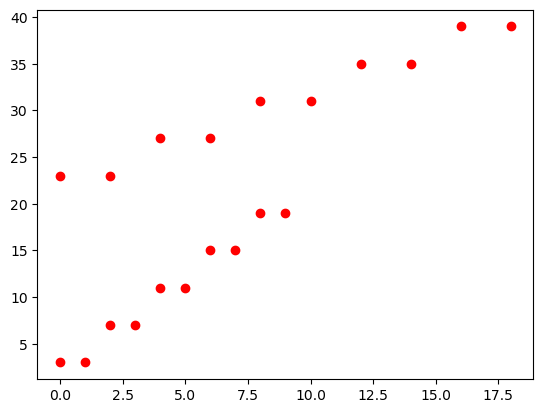

In [256]:
# Create the training loop
epochs = 10_000
for epoch in range(epochs):
    
    # forward pass
    y_predicted = model(X)
    loss = loss_function(y_predicted, y) # takes the predicted values and actual values
    
    # backward pass: calculate gradients
    loss.backward()
    
    
    # perform weight updates
    optimizer.step()
    
    # empty the gradients before the next iterations so they don't accumulate
    optimizer.zero_grad()

    # print(epoch + 1 % 10)
    if (epoch + 1) % 100 == 0: # every 10 iterations
        # print(epoch)
        print(f"epoch: {epoch+1}, loss = {loss.item():4f}")
        
# prot the graphs
# We detach so that this operation is not tracked in the computational graph
predicted = model(X).detach().numpy() # detach the tensor and then convert to numpy array again.
plt.plot(X, Y, "ro")
# plt.plot(X, predicted, "b")
plt.show()

